**Ground Vibration Prediction using Neural Network**

In [59]:
#mount/ connect the google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import  Dense

In [61]:
#load the ground vibration dataset
dataset = pd.read_csv('/content/drive/MyDrive/Blasting dataset.csv')
dataset.head(10)

,TIME(Hrs),Hole (Nos),Depth (m),Spacing(m),Burden (m),Stemming(m),Decking(m),Total Drill (RMT),Explosive(kg),Volume(m3),Powder Factor(kg/m3),Av. CPH,MCPD (kg/D),PPV MON,Seis. Dist. (m),A.O.P (dBL)
0,5.04PM,69,11,3.0,3.0,3,1/1.5M,850,3875.00,6831.00,0.57,56.52,113,10.5,360.0,115.8
1,5.36PM,30,7.5,3.2,2.8,3,NIL,225,1050.00,2016.00,0.52,35.00,35,2.75,315.0,101.4
2,5.07PM,33,4.5,3.0,3.0,2.5,NIL,148.5,469.46,1336.50,0.35,14.22,28.44,1.45,410.0,131.1
3,5.06PM,30,"6,7",3.5,2.8,3,NIL,214,659.00,1969.80,0.33,21.66,43.33,0.992,465.0,118.3
4,5.07PM,21,"6,7",3.8,3.0,2.5,NIL,140,525.00,1603.98,0.32,25.00,50,5.12,290.0,140.5
5,1.28PM,34,15,4.2,3.2,3,2/1.5M,510,2800.00,6854.40,0.41,82.45,82.45,9.09,310.0,125.1
6,1.31PM,30,5.5,3.2,2.8,3,NIL,171,700.00,1568.00,0.45,23.33,23.33,6.86,400.0,116
7,1.30PM,44,"5,6",3.0,2.5,3,NIL,262,875.00,1965.00,0.44,19.88,39.77,1.44,480.0,111.6
8,1.26PM,35,15,3.0,3.0,3,2/1.5M,550,2750.00,4725.00,0.57,78.57,157.14,0.579,465.0,83.4
9,1.23PM,28,10,3.5,3.0,3,1/1.5M,280,1275.00,2940.00,0.47,45.53,45.53,0.659,485.0,81.4


**Data Preprocessing**

In [62]:
# print the columns of the dataset
print(dataset.columns)

Index(['TIME(Hrs)', 'Hole (Nos)', 'Depth (m)', 'Spacing(m)', 'Burden (m)',
       'Stemming(m)', ' Decking(m)', 'Total Drill (RMT)', 'Explosive(kg)',
       'Volume(m3)', 'Powder Factor(kg/m3)', 'Av. CPH', 'MCPD (kg/D)',
       'PPV MON', 'Seis. Dist. (m)', 'A.O.P (dBL)'],
      dtype='object')


In [63]:
# selected the relavent columns for analysis
features_name = ['Spacing(m)','Burden (m)','Powder Factor(kg/m3)','MCPD (kg/D)','Seis. Dist. (m)','PPV MON']
df = dataset[features_name]
df

,Spacing(m),Burden (m),Powder Factor(kg/m3),MCPD (kg/D),Seis. Dist. (m),PPV MON
0,3.0,3.0,0.57,113,360.00,10.5
1,3.2,2.8,0.52,35,315.00,2.75
2,3.0,3.0,0.35,28.44,410.00,1.45
3,3.5,2.8,0.33,43.33,465.00,0.992
4,3.8,3.0,0.32,50,290.00,5.12
...,...,...,...,...,...,...
988,3.6,3.2,0.54,250,3.94,300
989,3.6,3.2,0.54,186.78,3.18,400
990,3.5,3.0,0.58,116.66,9.40,280
991,3.5,3.0,0.62,104.16,13.70,230


In [64]:
# rename the columns
df =df.rename(columns={'Seis. Dist. (m)': 'Distance', 'PPV MON': "Vibration"})
df.head(10)

,Spacing(m),Burden (m),Powder Factor(kg/m3),MCPD (kg/D),Distance,Vibration
0,3.0,3.0,0.57,113,360.0,10.5
1,3.2,2.8,0.52,35,315.0,2.75
2,3.0,3.0,0.35,28.44,410.0,1.45
3,3.5,2.8,0.33,43.33,465.0,0.992
4,3.8,3.0,0.32,50,290.0,5.12
5,4.2,3.2,0.41,82.45,310.0,9.09
6,3.2,2.8,0.45,23.33,400.0,6.86
7,3.0,2.5,0.44,39.77,480.0,1.44
8,3.0,3.0,0.57,157.14,465.0,0.579
9,3.5,3.0,0.47,45.53,485.0,0.659


In [65]:
# check the null vales and count the null values
df.isnull().sum()

Spacing(m)               0
Burden (m)               0
Powder Factor(kg/m3)     0
MCPD (kg/D)              1
Distance                63
Vibration               98
dtype: int64

In [66]:
# drop the rows which contains 'NaN' values
df =df.replace("NA", " ")
df =df.replace(' NA', " ")
df = df.replace(r'^\s*$', np.nan, regex=True)
blast_data =df.dropna( axis=0)

In [67]:
# shown the dataset information
blast_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 992
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Spacing(m)            891 non-null    float64
 1   Burden (m)            891 non-null    float64
 2   Powder Factor(kg/m3)  891 non-null    float64
 3   MCPD (kg/D)           891 non-null    object 
 4   Distance              891 non-null    float64
 5   Vibration             891 non-null    object 
dtypes: float64(4), object(2)
memory usage: 48.7+ KB


In [68]:
#convert the objects type to float type dataset
blast_data=blast_data.astype(float)


In [69]:
# showing the statistical parameters
blast_data.describe()

,Spacing(m),Burden (m),Powder Factor(kg/m3),MCPD (kg/D),Distance,Vibration
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,3.325477,2.936195,0.511576,95.640897,348.873871,29.940638
std,0.400788,0.255776,0.288460,69.219617,121.410182,100.768334
min,1.000000,0.900000,0.090000,5.000000,0.508000,0.039700
25%,3.000000,2.800000,0.440000,42.500000,310.500000,1.360000
50%,3.200000,3.000000,0.510000,77.380000,370.000000,2.410000
75%,3.500000,3.000000,0.570000,134.310000,410.000000,4.700000
max,4.300000,4.000000,8.330000,410.000000,740.000000,590.000000


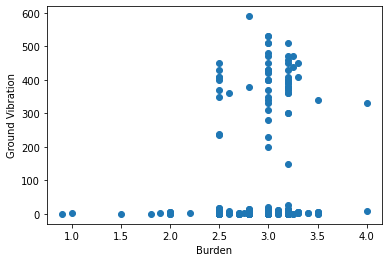

In [70]:
#plot between vibration and burden
plt.scatter(blast_data['Burden (m)'], blast_data['Vibration'])
plt.xlabel('Burden')
plt.ylabel('Ground Vibration')
plt.show()

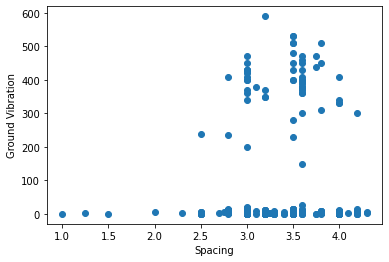

In [71]:
#plot between vibration and spacing
plt.scatter(blast_data['Spacing(m)'], blast_data['Vibration'])
plt.xlabel('Spacing')
plt.ylabel('Ground Vibration')
plt.show()

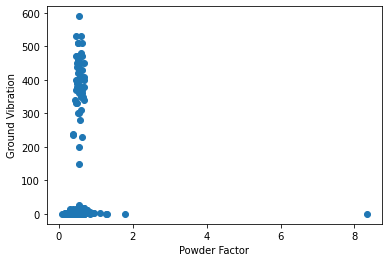

In [72]:
#plot between vibration and powder factor
plt.scatter(blast_data['Powder Factor(kg/m3)'], blast_data['Vibration'])
plt.xlabel('Powder Factor')
plt.ylabel('Ground Vibration')
plt.show()

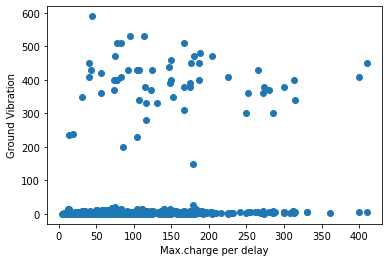

In [73]:
#plot between vibration and maximum charge per delay
plt.scatter(blast_data['MCPD (kg/D)'], blast_data['Vibration'])
plt.xlabel('Max.charge per delay')
plt.ylabel('Ground Vibration')
plt.show()

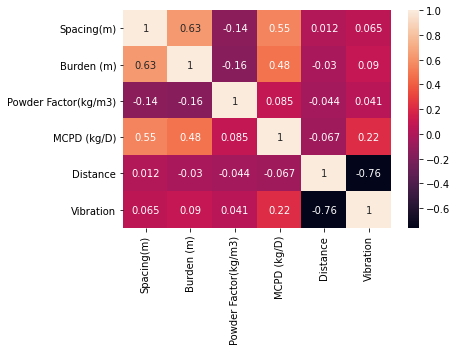

In [74]:
#showing the heatmap
import seaborn as sns
sns.heatmap(blast_data.corr(),annot = True)

In [75]:
#changing dataframe to numpy array
x = blast_data.iloc[:, :-1].values
y = blast_data.iloc[:, -1].values


In [76]:
# scaled the dataset having mean=0 & standard deviation =1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[-0.81254858  0.24959513  0.20265267  0.25092384  0.09169229]
 [-0.31325149 -0.53277695  0.02922088 -0.87655722 -0.27916024]
 [-0.81254858  0.24959513 -0.56044721 -0.97138127  0.50375067]
 ...
 [ 0.43569415  0.24959513  0.23733902  0.30382872 -2.79766103]
 [ 0.43569415  0.24959513  0.37608445  0.12314265 -2.76222401]
 [-1.31184567 -1.70633507 -0.42170178 -1.1818444  -2.76222401]]


In [77]:
# split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.15, random_state = 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(757, 5)
(757,)
(134, 5)
(134,)


**Neural Network Model**

In [78]:
# create the neural network model
model = Sequential()
model.add(Dense(15, activation="relu", input_dim =5))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [79]:
#compile the model with cost and optimiser function
model.compile(optimizer="adam", loss='mean_squared_error')


In [80]:
# fit the Neural network
model_perform =model.fit(x_train,y_train, epochs=35, steps_per_epoch=60, validation_data = (x_test, y_test), validation_split=0.15)

Epoch 1/35
60/60 [==============================] - 1s 5ms/step - loss: 12525.0125 - val_loss: 7521.3315
Epoch 2/35
60/60 [==============================] - 0s 1ms/step - loss: 11994.8715 - val_loss: 7394.7349
Epoch 3/35
60/60 [==============================] - 0s 2ms/step - loss: 10454.9486 - val_loss: 6979.0464
Epoch 4/35
60/60 [==============================] - 0s 2ms/step - loss: 12214.5020 - val_loss: 5925.3584
Epoch 5/35
60/60 [==============================] - 0s 1ms/step - loss: 7854.7151 - val_loss: 4400.0928
Epoch 6/35
60/60 [==============================] - 0s 1ms/step - loss: 6771.2580 - val_loss: 2803.5686
Epoch 7/35
60/60 [==============================] - 0s 1ms/step - loss: 4653.2590 - val_loss: 1561.3698
Epoch 8/35
60/60 [==============================] - 0s 1ms/step - loss: 2956.7468 - val_loss: 1008.2300
Epoch 9/35
60/60 [==============================] - 0s 1ms/step - loss: 1916.5231 - val_loss: 741.7689
Epoch 10/35
60/60 [==============================] - 0s 2ms/s

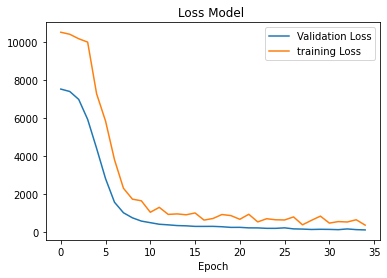

In [81]:
plt.plot(model_perform.history['val_loss'], label = "Validation Loss")
plt.plot(model_perform.history['loss'], label = "training Loss")
plt.legend()
plt.xlabel('Epoch')
plt.title('Loss Model ')
plt.show()

In [82]:
# predict the ground vibration
y_predict = model.predict(x_test)
score = model.evaluate(x_test,y_test)
print(score)

5/5 [==============================] - 0s 2ms/step - loss: 560.3359
560.3359375


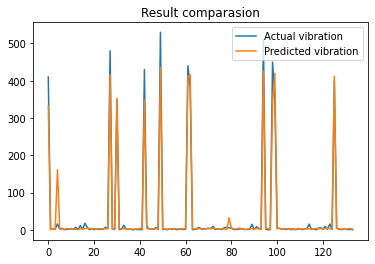

In [83]:
# compared predicted and actual vibration
plt.plot(y_test, label = "Actual vibration")
plt.plot(y_predict, label = "Predicted vibration")
plt.legend()
plt.title("Result comparasion")
plt.show()

**Linear Regression Model**


In [84]:
# import the linear regression model
from sklearn.linear_model import LinearRegression

In [85]:
#load the regression model
regress_model = LinearRegression()

In [86]:
#fit the linear regression model
regression_history =regress_model.fit(x_train,y_train)

In [87]:
# print the y intercept velue
print(regression_history.intercept_)

28.691009581831867


In [88]:
# print the coefficent of the line
print(regression_history.coef_)

[ -4.69875775   1.07257783  -1.24904128  20.55022082 -72.5018824 ]


In [89]:
# predicted the ground vibration
y_predc_regress = regression_history.predict(x_test)

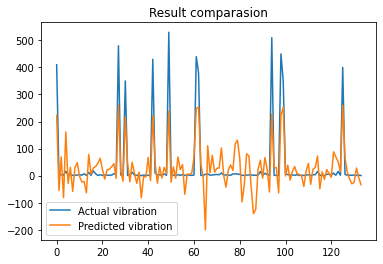

In [90]:
# compared the actual and predicted ground vibration
plt.plot(y_test, label = "Actual vibration")
plt.plot(y_predc_regress, label = "Predicted vibration")
plt.legend()
plt.title("Result comparasion")
plt.show()